
# Plot Metrics: Training Time vs. EER



## Validation

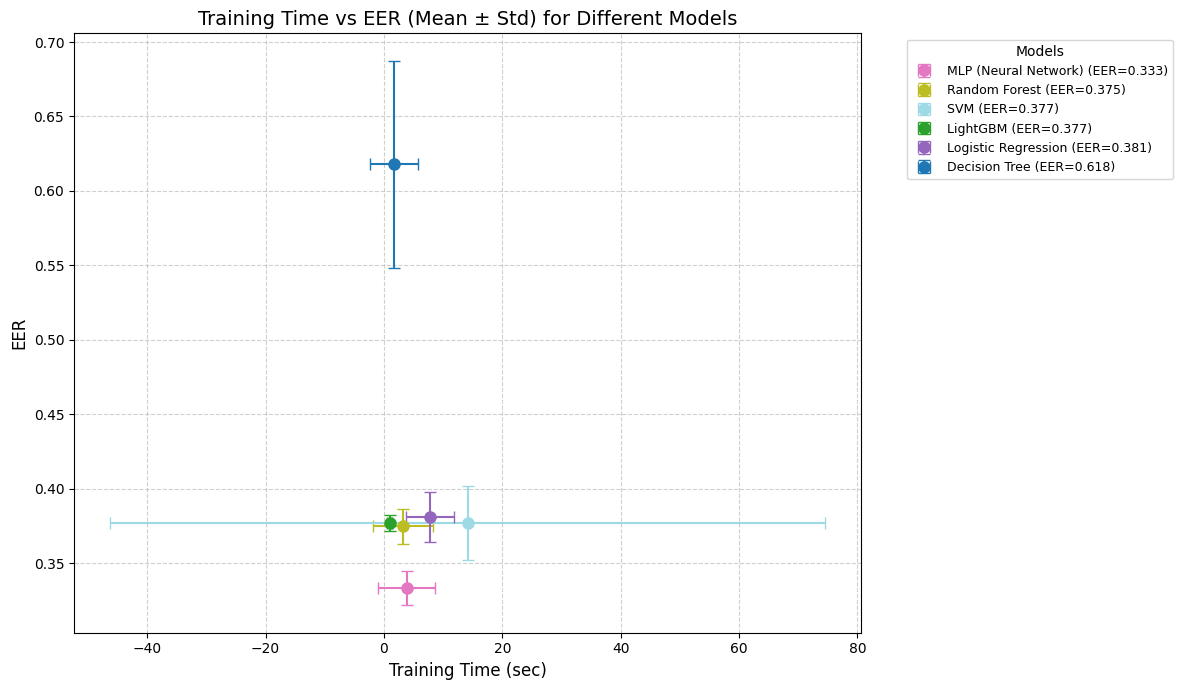

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Carregar métricas
df_metrics = pd.read_csv("model_metrics_test.csv")

# Agrupar e organizar
agg = df_metrics.groupby("Model").agg({
    "Training Time (sec)": ["mean", "std"],
    "EER": ["mean", "std"]
}).reset_index()
agg.columns = ["Model", "Time_mean", "Time_std", "EER_mean", "EER_std"]
agg = agg.sort_values("EER_mean")

# Cores consistentes
colors = cm.tab20(np.linspace(0, 1, len(agg)))

# Figura
plt.figure(figsize=(12, 7))

# Plot com legenda tradicional (colorida + EER incluído)
for i, row in agg.iterrows():
    label = f"{row['Model']} (EER={row['EER_mean']:.3f})"
    plt.errorbar(
        row["Time_mean"], row["EER_mean"],
        xerr=row["Time_std"], yerr=row["EER_std"],
        fmt='o', capsize=4, markersize=8,
        label=label, color=colors[i]
    )

# Layout
plt.xlabel("Training Time (sec)", fontsize=12)
plt.ylabel("EER", fontsize=12)
plt.title("Training Time vs EER (Mean ± Std) for Different Models", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.6)

# Legenda tradicional colorida e fora do gráfico
plt.legend(title="Models", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9)
plt.tight_layout()
plt.show()

## Test

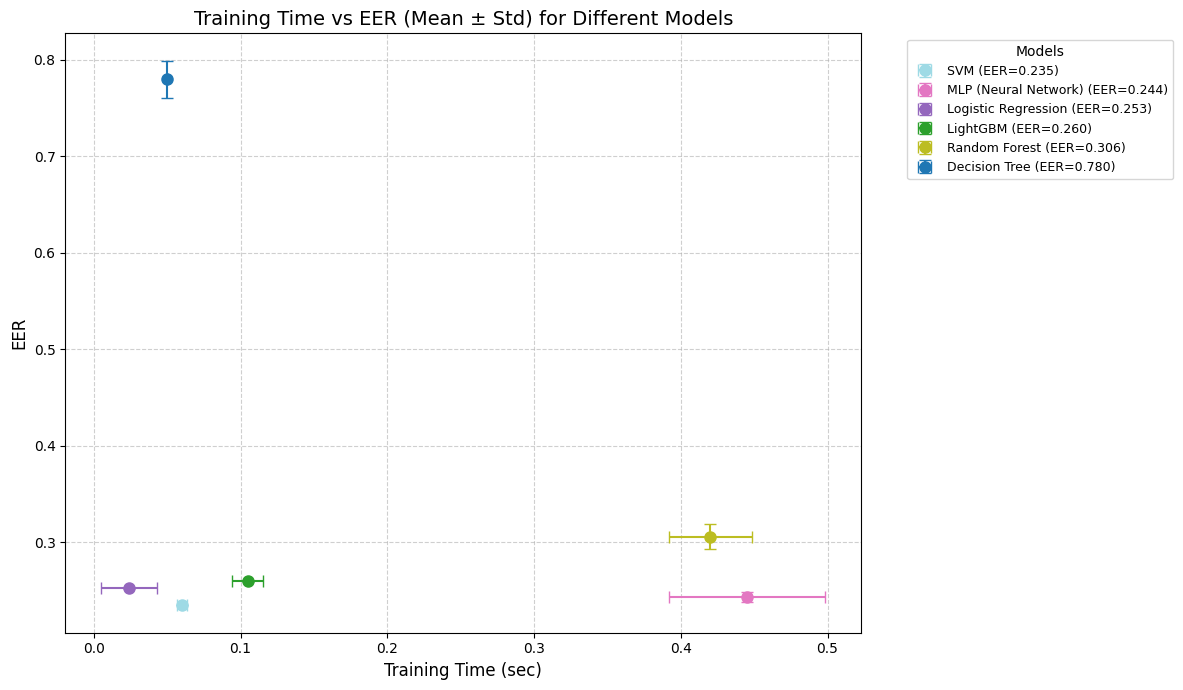

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Carregar métricas
df_metrics = pd.read_csv("model_metrics_test_mfcc.csv")

# Agrupar e organizar
agg = df_metrics.groupby("Model").agg({
    "Training Time (sec)": ["mean", "std"],
    "EER": ["mean", "std"]
}).reset_index()
agg.columns = ["Model", "Time_mean", "Time_std", "EER_mean", "EER_std"]
agg = agg.sort_values("EER_mean")

# Cores consistentes
colors = cm.tab20(np.linspace(0, 1, len(agg)))

# Figura
plt.figure(figsize=(12, 7))

# Plot com legenda tradicional (colorida + EER incluído)
for i, row in agg.iterrows():
    label = f"{row['Model']} (EER={row['EER_mean']:.3f})"
    plt.errorbar(
        row["Time_mean"], row["EER_mean"],
        xerr=row["Time_std"], yerr=row["EER_std"],
        fmt='o', capsize=4, markersize=8,
        label=label, color=colors[i]
    )

# Layout
plt.xlabel("Training Time (sec)", fontsize=12)
plt.ylabel("EER", fontsize=12)
plt.title("Training Time vs EER (Mean ± Std) for Different Models", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.6)

# Legenda tradicional colorida e fora do gráfico
plt.legend(title="Models", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9)
plt.tight_layout()
plt.show()


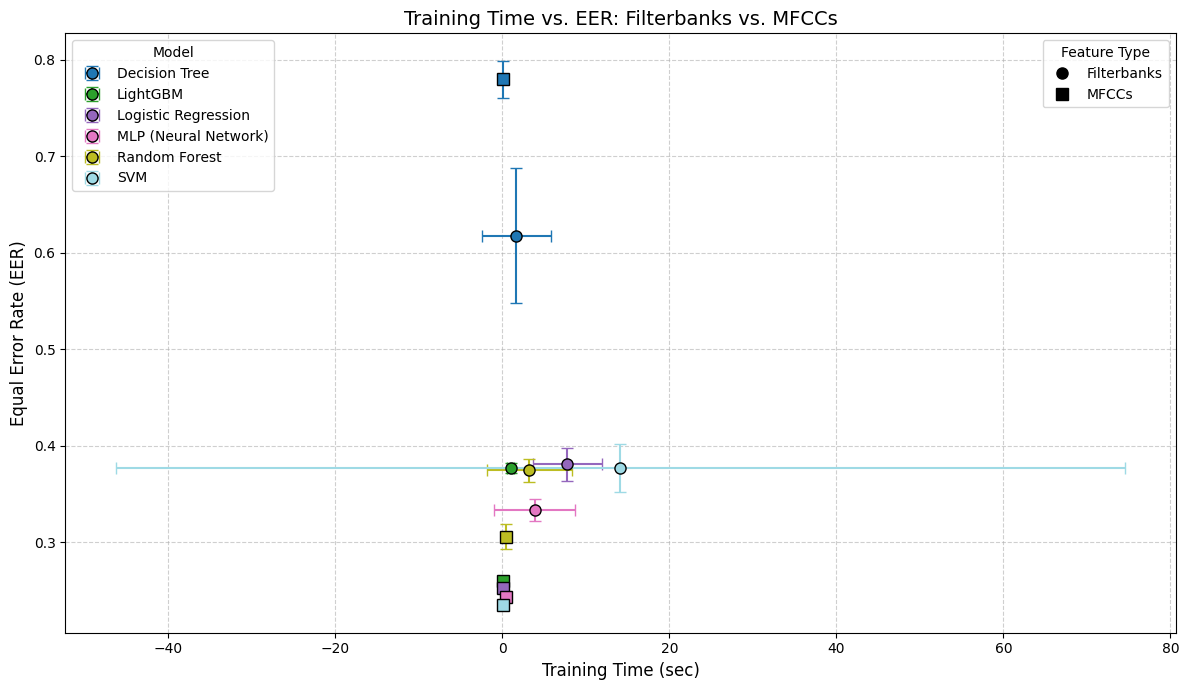

In [17]:
import matplotlib.lines as mlines


# Load metrics for filterbanks and MFCCs
df_fb   = pd.read_csv("model_metrics_test.csv").assign(Feature="Filterbanks")
df_mfcc = pd.read_csv("model_metrics_test_mfcc.csv").assign(Feature="MFCCs")

# Combine and aggregate
df_all = pd.concat([df_fb, df_mfcc], ignore_index=True)
agg = (
    df_all
    .groupby(["Model", "Feature"])
    .agg({"Training Time (sec)": ["mean", "std"], "EER": ["mean", "std"]})
    .reset_index()
)
agg.columns = ["Model", "Feature", "Time_mean", "Time_std", "EER_mean", "EER_std"]

# Color per model
models = agg["Model"].unique()
colors = dict(zip(models, cm.tab20(np.linspace(0,1,len(models)))))

# Marker per feature type
markers = {"Filterbanks": "o", "MFCCs": "s"}

plt.figure(figsize=(12, 7))
ax = plt.gca()

# Plot points with error bars
for _, row in agg.iterrows():
    color  = colors[row["Model"]]
    marker = markers[row["Feature"]]
    label  = row["Model"] if row["Feature"] == "Filterbanks" else None
    ax.errorbar(
        row["Time_mean"], row["EER_mean"],
        xerr=row["Time_std"], yerr=row["EER_std"],
        fmt=marker, markersize=8, capsize=4,
        markerfacecolor=color, markeredgecolor="k",
        ecolor=color, elinewidth=1.5,
        label=label
    )

# Legend: models
handles, labels = ax.get_legend_handles_labels()
leg1 = ax.legend(handles, labels, title="Model", loc="upper left")

# Legend: feature types
fb_handle   = mlines.Line2D([], [], color="k", marker="o", linestyle="None", markersize=8, label="Filterbanks")
mfcc_handle = mlines.Line2D([], [], color="k", marker="s", linestyle="None", markersize=8, label="MFCCs")
leg2 = ax.legend(handles=[fb_handle, mfcc_handle], title="Feature Type", loc="upper right")

ax.add_artist(leg1)

# Axis labels & title
ax.set_xlabel("Training Time (sec)", fontsize=12)
ax.set_ylabel("Equal Error Rate (EER)", fontsize=12)
ax.set_title("Training Time vs. EER: Filterbanks vs. MFCCs", fontsize=14)
ax.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()